In [18]:
import numpy as np
import pandas as pd
import matplotlib

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11


In [7]:
# read summary_flask_test_50_final.csv

results = pd.read_excel('summary_flask_test_50.xlsx')

In [8]:
results.head()

,scene_number,path,rotationSpeed,stop_angle,pause_time,volume_start,volume_poured,volume_received,spilled_volume,real_poured_volume,real_received_volume,real_spilled_volume,Unnamed: 12
0,1102,../../output/CellFlask/Flask_75_1799_4,0.03,4.0,1.8,72.3750,0.122500,0.010000,0.1125,0.0,0.0,0.0,Done
1,2588,../../output/CellFlask/Flask_135_1399_26,0.03,26.0,1.4,130.5650,115.852501,107.027496,8.8250,125.0,124.0,1.0,Done
2,1159,../../output/CellFlask/Flask_80_600_18,0.03,18.0,0.6,77.2650,38.947498,38.767502,0.1800,64.5,64.0,0.5,Done
3,2827,../../output/CellFlask/Flask_145_1399_4,0.03,4.0,1.4,140.1000,0.402500,0.220000,0.1825,0.0,0.0,0.0,Done
4,231,../../output/CellFlask/Flask_20_1799_12,0.03,12.0,1.8,19.5725,0.575000,0.510000,0.0650,0.0,0.0,0.0,Done


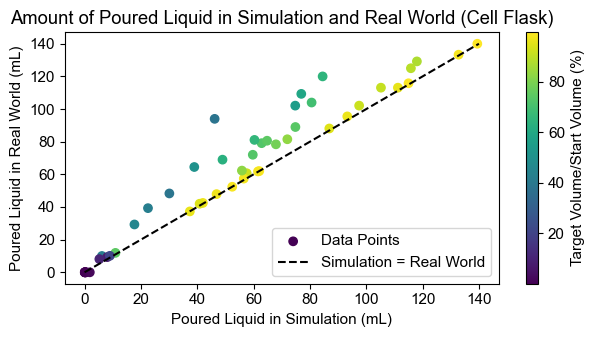

In [58]:
# scatterplot of volume_poured vs real_poured_volume

import matplotlib.pyplot as plt

# make scatter plot of volume_poured vs real_poured_volume with volume_start as color
plt.figure(figsize=(6.3, 3.5))
plt.scatter(results['volume_poured'], results['real_poured_volume'], c=results['volume_poured']/results['volume_start']*100)
#plt.scatter(results['volume_poured'], results['real_poured_volume'])
plt.xlabel('Poured Liquid in Simulation (mL)')
plt.ylabel('Poured Liquid in Real World (mL)')
# add diagonal line
plt.plot([0, 140], [0, 140], color='black', linestyle='--')

# add colorbar
colorbar = plt.colorbar()
colorbar.set_label('Target Volume/Start Volume (%)')
plt.title('Amount of Poured Liquid in Simulation and Real World (Cell Flask)')
plt.legend(['Data Points', 'Simulation = Real World'], loc='lower right')
plt.tight_layout()

# show plot
plt.show()


## Results of received volume

In [55]:
# calculate RMSE 
RMSE = np.sqrt(np.mean((results['volume_received'] - results['real_received_volume'])**2))
print('RMSE: ', RMSE)



# calculate mean percentage error
mean_percentage_error = np.mean(np.abs((results['volume_received']).astype(int) - (results['real_received_volume']).astype(int))/results['volume_received'])
print('Mean Percentage Error: ', mean_percentage_error.round(2)*100, '%')

# calculate r2 score
from sklearn.metrics import r2_score
r2 = r2_score(results['volume_received'], results['real_received_volume'])
print('r2 score: ', r2.round(2))


RMSE:  15.023635106810941
Mean Percentage Error:  21.0 %
r2 score:  0.83


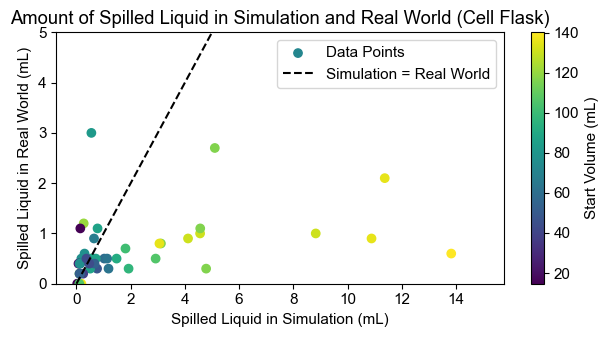

In [56]:
# scatterplot of volume_poured vs real_poured_volume

import matplotlib.pyplot as plt

# make scatter plot of volume_poured vs real_poured_volume with volume_start as color
plt.figure(figsize=(6.3, 3.5))
plt.scatter(results['spilled_volume'], results['real_spilled_volume'], c=results['volume_start'])
#plt.scatter(results['volume_poured'], results['real_poured_volume'])
plt.xlabel('Spilled Liquid in Simulation (mL)')
plt.ylabel('Spilled Liquid in Real World (mL)')
# add diagonal line
plt.plot([0, 15], [0, 15], color='black', linestyle='--')
plt.ylim(0, 5)
# add colorbar
colorbar = plt.colorbar()
colorbar.set_label('Start Volume (mL)')
plt.title('Amount of Spilled Liquid in Simulation and Real World (Cell Flask)')
plt.legend(['Data Points', 'Simulation = Real World'], loc='upper right')
plt.tight_layout()

# show plot
plt.show()
